In [ ]:
## import necessary library
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
## Read the dataset, convert it into dataframe
# from google.colab import files
# files.upload()

In [ ]:
## Read the dataset, convert it into dataframe
dataframe = pd.read_csv('/content/news.csv')
dataframe.head(10)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
dataframe.shape

(6335, 4)

In [ ]:
## Split data into X & Y
x = dataframe['text']
y = dataframe['label']

In [ ]:
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [ ]:
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
df = dataframe["label"].value_counts()
df

REAL    3171
FAKE    3164
Name: label, dtype: int64

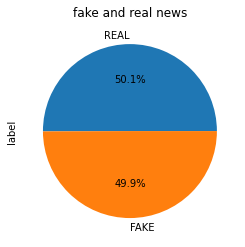

In [ ]:
df.plot(kind="pie",title="fake and real news", autopct='%1.1f%%')

In [ ]:
#Now, let's split the data into training and testing, and fit the algorithm.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [ ]:
x_train.head()

2402    Christian Whiton is a former deputy special en...
1922    Super Tuesday Brings Harsh Light And Heartache...
3475    Prev post Page 1 of 4 Next \nNurses are among ...
6197    The deadly hostage situation at a luxury hotel...
4748    Our new country: Women and minorities hit hard...
Name: text, dtype: object

In [ ]:
x_test.head()

3789    Watch the above reports by CBN's David Brody a...
733     — Bernie Sanders (@BernieSanders) October 27, ...
4783    \nAs of October 29, there have been at least 1...
3067    Members of Congress have said that if Hillary ...
5288    Julian Zelizer is a professor of history and p...
Name: text, dtype: object

In [ ]:
## Now we need to fit the TFIDF Vectorizer.
# max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
# max_df = 25 means "ignore terms that appear in more than 25 documents".
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)


In [ ]:
print(tfid_x_test)

  (0, 60873)	0.04199293292033408
  (0, 60756)	0.03102467179929353
  (0, 60501)	0.025828759280643834
  (0, 60332)	0.022016410662716892
  (0, 60328)	0.029457870632407204
  (0, 60325)	0.05310926248634118
  (0, 60321)	0.037769691024057916
  (0, 60309)	0.028599297592098793
  (0, 60242)	0.02078664460607839
  (0, 60238)	0.02304876060617083
  (0, 60112)	0.06661620569458904
  (0, 60053)	0.026671179085014728
  (0, 59998)	0.08675332085991751
  (0, 59769)	0.018014389086953634
  (0, 59489)	0.01857186718038564
  (0, 59463)	0.029849288660946164
  (0, 59407)	0.03540084521652464
  (0, 59298)	0.03597852101133186
  (0, 59294)	0.07902793135900811
  (0, 59273)	0.025874119034496358
  (0, 59218)	0.030026827265587194
  (0, 59168)	0.03570687883899036
  (0, 59054)	0.055031944270905395
  (0, 58993)	0.05992243785134022
  (0, 58912)	0.049809921799913816
  :	:
  (1266, 5288)	0.04448311123524479
  (1266, 4956)	0.017480678533077217
  (1266, 4712)	0.02575856859832166
  (1266, 4225)	0.027560846706771686
  (1266, 3720)	

*Logistic* Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(tfid_x_train , y_train)

LogisticRegression()

In [ ]:
lr_pred=LR.predict(tfid_x_test)
lr_pred

array(['REAL', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       615
        REAL       0.93      0.90      0.92       652

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [26]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':lr_pred})
df1.head(10)

,Actual,Predicted
3789,REAL,REAL
733,FAKE,FAKE
4783,FAKE,FAKE
3067,FAKE,FAKE
5288,REAL,REAL
3388,REAL,REAL
1328,FAKE,FAKE
2815,FAKE,FAKE
3417,FAKE,REAL
2472,FAKE,FAKE


In [ ]:
# Function to plot the confusion matrix 
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True ')
    plt.xlabel('Predicted')

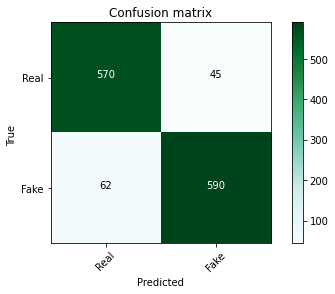

In [ ]:
cm1 = metrics.confusion_matrix(y_test, lr_pred)
plot_confusion_matrix(cm1, classes=['Real', 'Fake'])